<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/momentum_monthly_3_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = yf.download(['TGMA3.SA','KEPL3.SA','CSUD3.SA','RANI3.SA','FRAS3.SA'],period='3y')['Adj Close'].resample('M').last().pct_change()+1
bench = yf.download('BOVA11.SA',period='3y')['Adj Close'].resample('M').last().pct_change()+1

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
def rolling_ret(data, m):
  return data.rolling(m).apply(np.prod)

In [4]:
ret9 = rolling_ret(data,9)

In [5]:
ret9

,CSUD3.SA,FRAS3.SA,KEPL3.SA,RANI3.SA,TGMA3.SA
Date,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-01-31,NaN,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN,NaN


In [7]:
'''
Every month we measure the momentum of each ETF and buy and hold the top 3 with the highest momentum the prior month. The strategy is rebalanced monthly.
'''
def get_top(date):
  top = ret9.loc[date].nlargest(3).index
  return top.to_list()

get_top('2023-02-28')

['RANI3.SA', 'TGMA3.SA', 'FRAS3.SA']

In [8]:
def port_ret(date):
  porta=data.loc[date:,get_top(date)[1:2]]
  return porta.mean(axis=1).values[0]

In [9]:
port_ret('2023-03-31')

0.9429015109345444

In [16]:
data['returns']=1.0
for i in range(1,len(data)-1):
  data['returns'].iloc[i]=port_ret(data.index[i])

In [17]:
data['ibov'] = bench.cumprod()
data['cart'] = data['returns'].cumprod()

<Axes: xlabel='Date'>

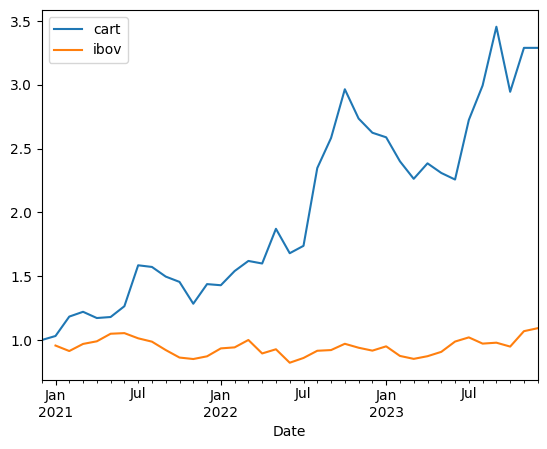

In [18]:
data[['cart','ibov']].plot()

In [13]:
import pandas
df = pandas.DataFrame({'Team-1':[5, 4, 9], 'Team-2':[3, 4, 5], 'Team-3':[1, 9, 7]})
print(df, '\n')

def func(r):
   return r[0]+r[1]+r[2]



   Team-1  Team-2  Team-3
0       5       3       1
1       4       4       9
2       9       5       7 



In [14]:
df.apply(func, axis=1)


/tmp/ipykernel_40458/2704090494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return r[0]+r[1]+r[2]


0     9
1    17
2    21
dtype: int64

In [15]:
df['sum'] = df.apply(func, axis=1)
print(df)

   Team-1  Team-2  Team-3  sum
0       5       3       1    9
1       4       4       9   17
2       9       5       7   21


/tmp/ipykernel_40458/2704090494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return r[0]+r[1]+r[2]
